<a href="https://colab.research.google.com/github/marianamrtns/praticas/blob/master/Data_science_aula2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import pandas as pd
notas = pd.read_csv("ratings.csv")
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [75]:
notas.shape

(100836, 4)

In [76]:
notas.columns = ["usuarioId", "filmeId","nota", "momento"]
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [77]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [78]:
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [79]:
notas['nota'].mean()

3.501556983616962

In [80]:
notas.nota.head()

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: nota, dtype: float64

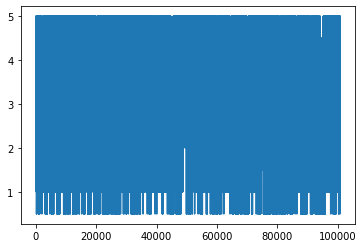

In [81]:
notas.nota.plot()

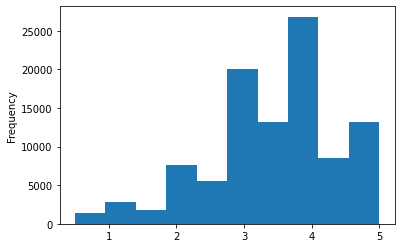

In [82]:
notas.nota.plot(kind="hist")

In [83]:
print("Média", notas['nota'].mean())
print("Mediana", notas['nota'].median())

Média 3.501556983616962
Mediana 3.5


In [84]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

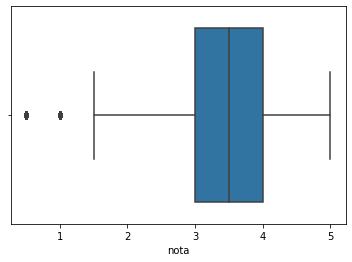

In [85]:
import seaborn as sns

sns.boxplot(notas.nota)

Importa o aquivo; Renomeia as colunas; 5 primeiros dados

In [86]:
filmes = pd.read_csv("movies.csv")
filmes.columns = ["filmeId", "titulo", "genero"]
filmes.head()

,filmeId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


5 primeiros dados

In [87]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


#**Analisando** **notas por filme**

Calculo da média das notas por filme

In [88]:
notas.query("filmeId==1").nota.mean()

3.9209302325581397

In [89]:
notas.query("filmeId==2").nota.mean()

3.4318181818181817

Mostra apenas a coluna de interesse

In [90]:
medias_por_filme = notas.groupby('filmeId').mean()['nota']
medias_por_filme.head()


filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

Define o tipo de gráfico

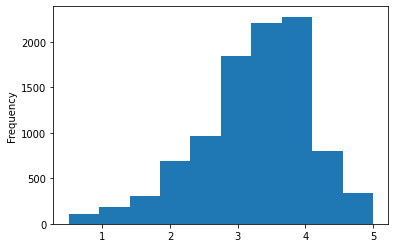

In [91]:
medias_por_filme.plot(kind='hist')

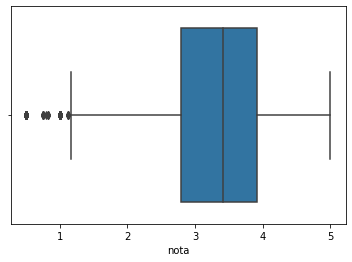

In [92]:
sns.boxplot(medias_por_filme)

In [93]:
medias_por_filme.describe()


count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

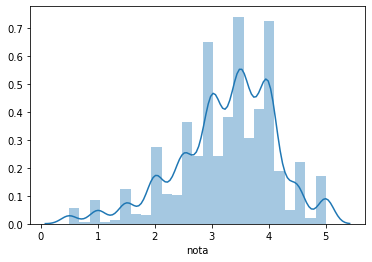

In [94]:
sns.distplot(medias_por_filme, bins=25)

Text(0.5, 1.0, 'Histograma das médias dos filmes')

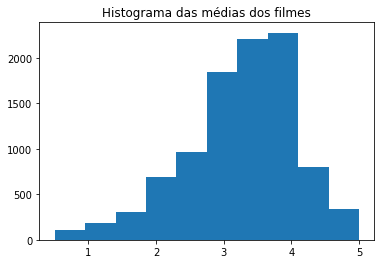

In [95]:
import matplotlib.pyplot as plt

plt.hist(medias_por_filme)
plt.title("Histograma das médias dos filmes")

In [96]:
tmdb=pd.read_csv('tmdb_5000_movies.csv')
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [97]:
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [98]:
contagem_linguas = tmdb.original_language.value_counts().to_frame().reset_index()
contagem_linguas.columns = ['original_language', 'total']
contagem_linguas.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


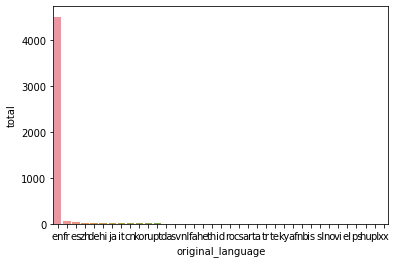

In [99]:
sns.barplot(x = 'original_language', y = 'total', data = contagem_linguas)

In [100]:
!pip install seaborn==0.9.0

import seaborn as sns
print(sns.__version__)

0.10.0


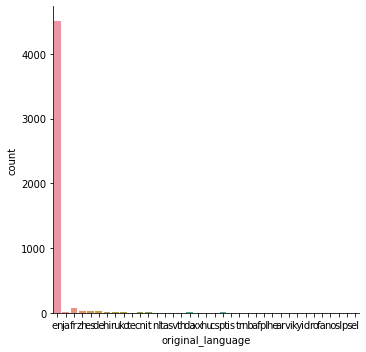

In [101]:
sns.catplot(x = 'original_language', kind = "count", data = tmdb)

([<matplotlib.patches.Wedge at 0x7ff97d2ec6a0>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ko'),
  Text(1.0960865535188649, -0.09270527058984593, 'ru'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'he'),
  Text

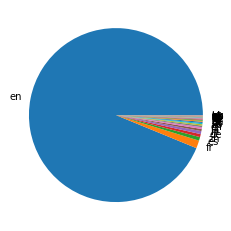

In [102]:
plt.pie(contagem_linguas['total'], labels= contagem_linguas['original_language'])

In [0]:
total_lingua = tmdb['original_language'].value_counts()

In [104]:
total_geral =total_lingua.sum()
total_ingles = total_lingua.loc['en']
total_resto = total_geral - total_ingles
print(total_ingles, total_resto)

4505 298


In [105]:
dados = {
    'língua': ['Ingles', 'Outros'],
    'total': [tota_ingles, total_resto]
}
dados

{'língua': ['Ingles', 'Outros'], 'total': [4505, 298]}

In [106]:
pd.DataFrame(dados)

,língua,total
0,Ingles,4505
1,Outros,298


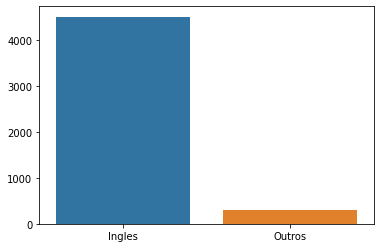

In [107]:
sns.barplot(x='língua', y='total', data=dados)

([<matplotlib.patches.Wedge at 0x7ff97d1934e0>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'Ingles'),
  Text(1.0791697511565306, -0.2130555049482467, 'Outros')])

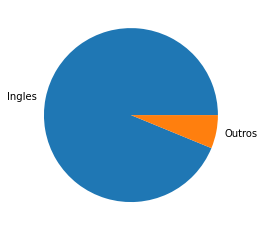

In [108]:
plt.pie(dados['total'], labels= dados['língua'])

In [114]:
total_outras_linguas = tmdb.query("original_language != 'en'").original_language.value_counts()
total_outras_linguas

fr    70
es    32
zh    27
de    27
hi    19
ja    16
it    14
cn    12
ru    11
ko    11
pt     9
da     7
sv     5
fa     4
nl     4
he     3
th     3
ta     2
cs     2
ar     2
ro     2
id     2
hu     1
sl     1
ps     1
ky     1
no     1
vi     1
af     1
nb     1
te     1
el     1
pl     1
xx     1
is     1
tr     1
Name: original_language, dtype: int64

In [0]:
filmes_outras_linguas = tmdb.query("original_language != 'en'")

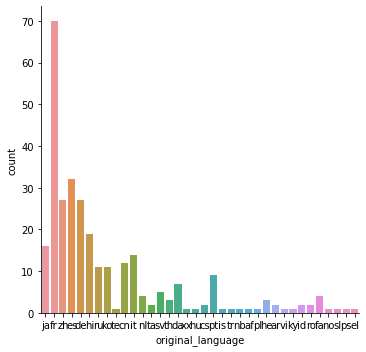

In [116]:
sns.catplot(x = 'original_language', kind='count', data = filmes_outras_linguas)

Alterando o formato do gráfico

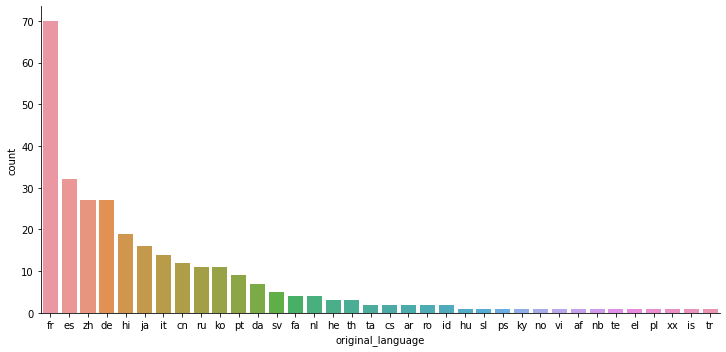

In [118]:
filmes_outras_linguas = tmdb.query("original_language != 'en'")

sns.catplot(x = 'original_language', kind='count', data = filmes_outras_linguas, aspect=2, order= total_outras_linguas.index)

Alterar as cores do gráfico, busca as cores na documentação

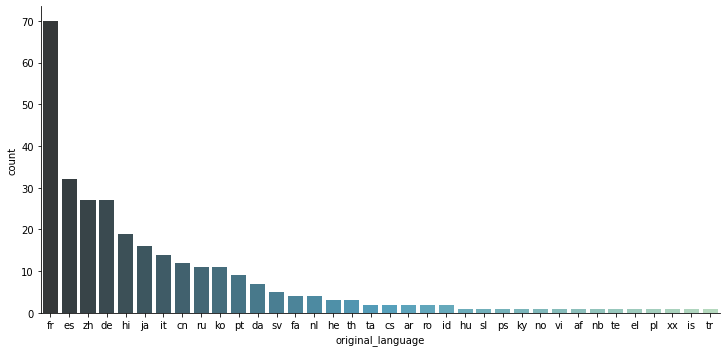

In [119]:
sns.catplot(x = 'original_language', kind='count', data = filmes_outras_linguas, aspect=2, 
            palette="GnBu_d",
            order= total_outras_linguas.index)

In [122]:
Notas_Toy_Story=notas.query("filmeId==1")
Notas_Jumanji=notas.query("filmeId==2")
print(len(Notas_Toy_Story), len(Notas_Jumanji))

215 110


In [127]:
print("Nota média do Toy Story %.2f"% Notas_Toy_Story.nota.mean())
print("Nota média do Jumanji %.2f"% Notas_Jumanji.nota.mean())

Nota média do Toy Story 3.92
Nota média do Jumanji 3.43


Mostrar todos os filmes que possuem a mesma nota


In [0]:
import numpy as np

filme np.array([2.5] = 10)

Código para criação de gráfico linear

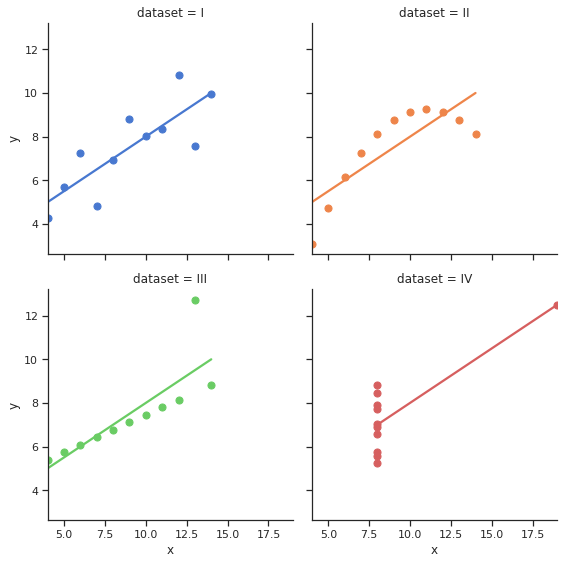

In [120]:
import seaborn as sns
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})